**A Convolutional Neural Network (CNN)** is a type of deep learning model that is primarily used for processing and analyzing visual data.   
CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input images, making them particularly effective for tasks like image recognition and classification

**Use Cases for CNNs**  
CNNs are widely used in various domains, including:  

- Image Classification: Classifying objects within images into predefined categories. For example, identifying whether an image contains a cat, dog, or car.  

-  Object Detection: Locating and identifying multiple objects within an image, such as detecting pedestrians and vehicles in a self-driving car's camera feed.  
- Image Segmentation: Dividing an image into segments or regions, often used in medical imaging to isolate tumors or organs.  
- Face Recognition: Identifying or verifying individuals from images or video frames.  
- Image Generation: Generating new images using techniques like Generative Adversarial Networks (GANs), where CNNs play a key role in the architecture. 
 


**Convolutional Layers**  
Purpose: These layers apply a set of filters (or kernels) to the input image to extract features such as edges, textures, and patterns.  
Operation: The filter slides over the input, performing a convolution operation, which results in feature maps that highlight specific features in the input.  
**Pooling Layers:**  
Purpose: These layers reduce the spatial dimensions (width and height) of the feature maps, thereby reducing the computational load and focusing on the most important features.   
Max Pooling, which selects the maximum value in each patch of the feature map, and Average Pooling, which takes the average.  
**Fully Connected Layers:**    
Purpose: After several convolutional and pooling layers, the output is flattened and passed through fully connected layers, where each neuron is connected to every neuron in the previous layer. These layers make the final decision about the classification or prediction.  
Output: The final layer typically uses an activation function like Softmax for classification tasks, providing the probabilities of each class.  
**Activation Functions:**    
Purpose: Activation functions introduce non-linearity into the network, allowing it to learn more complex patterns.
Common Types: ReLU (Rectified Linear Unit) is the most commonly used activation function in CNNs, applied after each convolutional layer to add non-linearity.
**Dropout Layers:**  
Purpose: Dropout is a regularization technique used to prevent overfitting. It randomly "drops out" (sets to zero) a fraction of the neurons during training, forcing the network to learn more robust features.


**Problem Description**  
The problem we are solving with this Convolutional Neural Network (CNN) model is image classification using the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images across 10 different classes, including airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each image is labeled with one of these classes, and the goal is to correctly identify the class of any given image.

Image classification is a fundamental problem in computer vision, with applications ranging from object recognition in photos to autonomous vehicle navigation, where correctly identifying objects in the environment is crucial.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalización de los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:


# Definición del modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluación del modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Accuracy en test: {test_acc:.2f}')


170498071/170498071 [==============================] - 29s 0us/step
Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5109 - accuracy: 0.4517 - val_loss: 1.2588 - val_accuracy: 0.5537
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1644 - accuracy: 0.5888 - val_loss: 1.1162 - val_accuracy: 0.6054
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0087 - accuracy: 0.6464 - val_loss: 1.0238 - val_accuracy: 0.6448
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9028 - accuracy: 0.6825 - val_loss: 0.9545 - val_accuracy: 0.6678
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8271 - accuracy: 0.7115 - val_loss: 0.9009 - val_accuracy: 0.6800
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7711 - accuracy: 0.7305 - val_loss: 0.8664 - val_accuracy: 0.6964
Epoch 7/10
1563/1563 [==============================] - 

**Improvements Made:**  
**Increased the Number of Filters**: The model now uses 64, 128, and 256 filters in different convolutional layers to learn more complex features.  
**Added More Layers**: The model has additional convolutional layers to capture more hierarchical features.  
**Dropout Layers**: Added dropout layers to prevent overfitting. Dropout randomly drops units (along with their connections) during training, which forces the network to generalize better.  
**Data Augmentation**: Applied data augmentation to artificially increase the size of the training dataset, improving the model's robustness to unseen data.  
**Lower Learning Rate**: Reduced the learning rate to make the optimizer converge more steadily to a better minimum. 
**Padding Strategy**: Changed padding='valid' to padding='same' in the MaxPooling2D layers. This padding ensures that the spatial dimensions don't reduce too much, avoiding the error.
**Layer Adjustments**: Kept the number of pooling layers but adjusted the architecture to prevent the reduction of the spatial dimensions to an invalid size. 

In [4]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

model2 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),  
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model with a lower learning rate
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the model using data augmentation
model2.fit(datagen.flow(x_train, y_train, batch_size=64),
          epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Predictions and classification report
y_pred = np.argmax(model2.predict(x_test), axis=-1)

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=[
      'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))

# Confusion matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Visualize a prediction
import matplotlib.pyplot as plt

# Select a random test image
random_idx = np.random.randint(0, len(x_test))
random_image = x_test[random_idx]
random_label = y_test[random_idx]



Epoch 1/10
782/782 [==============================] - 218s 278ms/step - loss: 1.9596 - accuracy: 0.1454 - val_loss: 1.6315 - val_accuracy: 0.1098
Epoch 2/10
782/782 [==============================] - 211s 270ms/step - loss: 1.6265 - accuracy: 0.1009 - val_loss: 1.4096 - val_accuracy: 0.0801
Epoch 3/10
782/782 [==============================] - 226s 290ms/step - loss: 1.4813 - accuracy: 0.0976 - val_loss: 1.2763 - val_accuracy: 0.1161
Epoch 4/10
782/782 [==============================] - 205s 263ms/step - loss: 1.3861 - accuracy: 0.0971 - val_loss: 1.2864 - val_accuracy: 0.0821
Epoch 5/10
782/782 [==============================] - 198s 253ms/step - loss: 1.3113 - accuracy: 0.0962 - val_loss: 1.2741 - val_accuracy: 0.1111
Epoch 6/10
782/782 [==============================] - 212s 271ms/step - loss: 1.2459 - accuracy: 0.0969 - val_loss: 1.1344 - val_accuracy: 0.0834
Epoch 7/10
782/782 [==============================] - 193s 247ms/step - loss: 1.2007 - accuracy: 0.0956 - val_loss: 1.1113 -

NameError: name 'model' is not defined

1/1 [==============================] - 0s 19ms/step


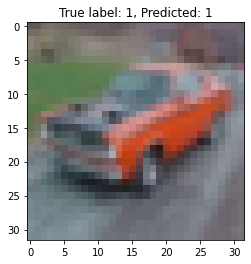

In [5]:
prediction = model2.predict(np.expand_dims(random_image, axis=0))
predicted_class = np.argmax(prediction, axis=-1)

# Display the image and prediction
plt.imshow(random_image)
plt.title(f"True label: {random_label[0]}, Predicted: {predicted_class[0]}")
plt.show()

1/1 [==============================] - 0s 18ms/step


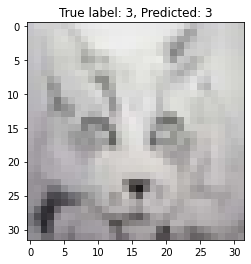

In [8]:
# Select a random test image
random_idx = np.random.randint(0, len(x_test))
random_image = x_test[random_idx]
random_label = y_test[random_idx]
prediction = model2.predict(np.expand_dims(random_image, axis=0))
predicted_class = np.argmax(prediction, axis=-1)

# Display the image and prediction
plt.imshow(random_image)
plt.title(f"True label: {random_label[0]}, Predicted: {predicted_class[0]}")
plt.show()

1/1 [==============================] - 0s 18ms/step


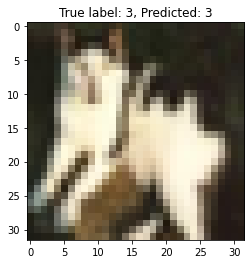

In [9]:
# Select a random test image
random_idx = np.random.randint(0, len(x_test))
random_image = x_test[random_idx]
random_label = y_test[random_idx]
prediction = model2.predict(np.expand_dims(random_image, axis=0))
predicted_class = np.argmax(prediction, axis=-1)

# Display the image and prediction
plt.imshow(random_image)
plt.title(f"True label: {random_label[0]}, Predicted: {predicted_class[0]}")
plt.show()

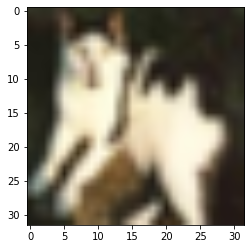

In [11]:
plt.imshow(random_image, interpolation='bilinear')


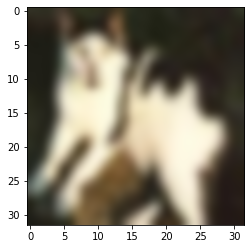

In [12]:
plt.imshow(random_image, interpolation='bicubic')


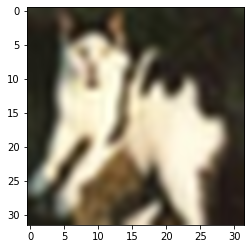

In [14]:
plt.imshow(random_image, interpolation='lanczos')
